<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> Analyzing Factors Influencing Player Value Prediction in Soccer Leagues </div> -->



<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>Soccer Transfer Market Player Value Prediction in Soccer Leagues</center></h1> 

<center>
<img style="align:center;" src="https://www.thestatesman.com/wp-content/uploads/2020/06/fifa-21_ED.jpg" width=900>
</center>

<!-- <div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px;
            height:500px"> TABLE OF CONTENT</div> -->




                      
</div>


<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>IMPORTING LIBRARIES</center></h1> 


In [2]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas.compat._optional")

In [3]:
sns.set()
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3)

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>LOADING DATASET</center></h1> 

In [5]:
data=pd.read_csv('transfermarkt_fbref_201718.csv', delimiter=';', index_col=0)
df_1718=data.copy()
df_1718.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

In [6]:
data1=pd.read_csv('transfermarkt_fbref_201819.csv', delimiter=';', index_col=0)
df_1819=data1.copy()
df_1819.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

In [7]:
data2=pd.read_csv('transfermarkt_fbref_201920.csv', delimiter=';', index_col=0)
df_1920=data2.copy()
df_1920.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

In [8]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [9]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

In [11]:
df.head()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>DATA DESCRIPTION</center></h1> 

### DATA CONTENT:

* This project explores the use of machine learning to predict the market value of professional soccer players using rich datasets from both real-world transfer markets and FIFA 21 game data. The core transfer data, sourced from Kaggle, covers global market activity between 2017 and 2020, offering insights into player value fluctuations across seasons. This dataset provides an in-depth view of each player’s in game profile, comprising over 100 individual attributes. These attributes span key categories such as Attacking, Skills, Defense, Mentality, and Goalkeeping, and also include details about positions, club and national team roles, and financial data like wages and salaries.

* Together, these datasets enable a comprehensive modeling approach that factors in both statistical performance and in-game traits to estimate player market value. By building and comparing regression models, this notebook demonstrates the full pipeline from preprocessing and EDA to model tuning and validation. The project is intended to be updated annually as new player and transfer data becomes available, and includes links to original data sources for further exploration and reproducibility.

<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>EXPLORATORY ANALYSIS</center></h1> 

In [96]:
# Basic info
print('Shape of the data:',df.shape)

Shape of the data: (6953, 400)


In [ ]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

In [ ]:
df.dtypes

In [14]:
# describe the data
df.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,goalsm,assistsm,pens_madem,pens_attm,cards_yellowm,cards_redm,goals_per90m,assists_per90m,goals_assists_per90m,goals_pens_per90m,goals_assists_pens_per90m,xgm,npxgm,xam,xg_per90m,xa_per90m,xg_xa_per90m,npxg_per90m,npxg_xa_per90m,minutes_90sm,shots_totalm,shots_on_targetm,shots_free_kicksm,shots_on_target_pctm,shots_total_per90m,shots_on_target_per90m,goals_per_shotm,goals_per_shot_on_targetm,npxg_per_shotm,xg_netm,npxg_netm,passes_completedm,passesm,passes_pctm,passes_total_distancem,passes_progressive_distancem,passes_completed_shortm,passes_shortm,passes_pct_shortm,passes_completed_mediumm,passes_mediumm,passes_pct_mediumm,passes_completed_longm,passes_longm,passes_pct_longm,xa_netm,assisted_shotsm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,progressive_passesm,passes_livem,passes_deadm,passes_free_kicksm,through_ballsm,passes_pressurem,passes_switchesm,crossesm,corner_kicksm,corner_kicks_inm,corner_kicks_outm,corner_kicks_straightm,passes_groundm,passes_lowm,passes_highm,passes_left_footm,passes_right_footm,passes_headm,throw_insm,passes_other_bodym,passes_offsidesm,passes_oobm,passes_interceptedm,passes_blockedm,scam,s

In [ ]:
df.info()

In [15]:
df.index = range(len(df))

<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> FEATURE ENGINEERING</div> -->

<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>Creating Test Set</center></h1> 

In [16]:
df = df.dropna(subset=['value'])
df.index = range(len(df))

Given that new data will always be the upcoming year, I used StratifiedShuffleSplit to have a well distributed train and test set by year.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['year']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [18]:
df_train = train_set.copy()

<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>MISSING VALUES</center></h1> 

In [ ]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

In [ ]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

In [ ]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [ ]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

In [ ]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

<a id='7'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA VISUALIZATION</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>DATA VISUALIZATION</center></h1> 



In [24]:
#Categorical Data

df_cat = train_set.select_dtypes(include=['object'])
df_cat.drop(columns=['Attendance','Season'], axis=1, inplace=True)

In [25]:
df_num = train_set.select_dtypes(exclude=['object'])

In [26]:
train_set.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,goalsm,assistsm,pens_madem,pens_attm,cards_yellowm,cards_redm,goals_per90m,assists_per90m,goals_assists_per90m,goals_pens_per90m,goals_assists_pens_per90m,xgm,npxgm,xam,xg_per90m,xa_per90m,xg_xa_per90m,npxg_per90m,npxg_xa_per90m,minutes_90sm,shots_totalm,shots_on_targetm,shots_free_kicksm,shots_on_target_pctm,shots_total_per90m,shots_on_target_per90m,goals_per_shotm,goals_per_shot_on_targetm,npxg_per_shotm,xg_netm,npxg_netm,passes_completedm,passesm,passes_pctm,passes_total_distancem,passes_progressive_distancem,passes_completed_shortm,passes_shortm,passes_pct_shortm,passes_completed_mediumm,passes_mediumm,passes_pct_mediumm,passes_completed_longm,passes_longm,passes_pct_longm,xa_netm,assisted_shotsm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,progressive_passesm,passes_livem,passes_deadm,passes_free_kicksm,through_ballsm,passes_pressurem,passes_switchesm,crossesm,corner_kicksm,corner_kicks_inm,corner_kicks_outm,corner_kicks_straightm,passes_groundm,passes_lowm,passes_highm,passes_left_footm,passes_right_footm,passes_headm,throw_insm,passes_other_bodym,passes_offsidesm,passes_oobm,passes_interceptedm,passes_blockedm,scam,s

In [27]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

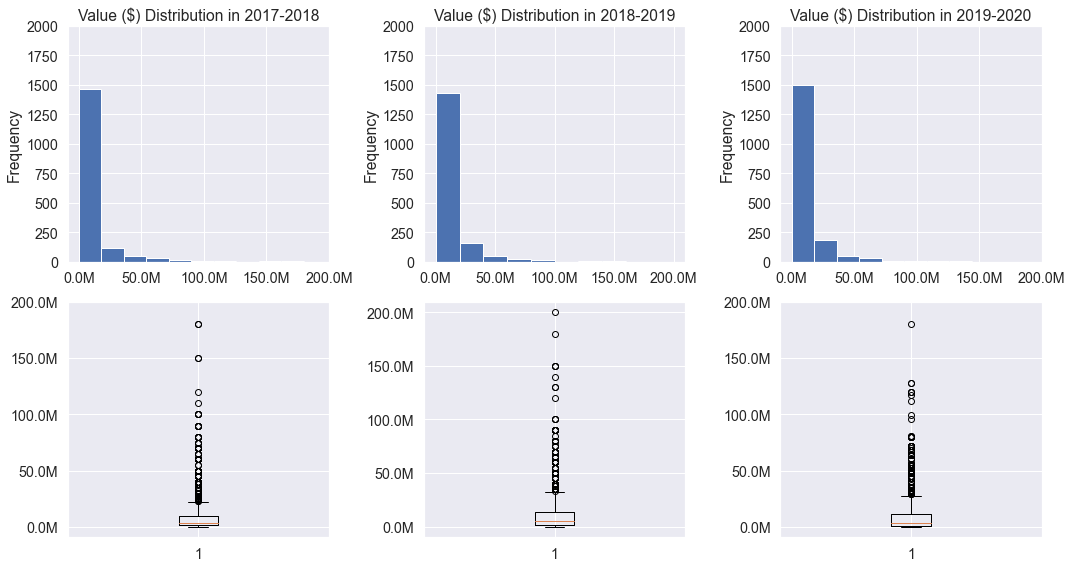

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))

for i, yr in enumerate([2017, 2018, 2019]):
    df_yr = train_set[train_set['year'] == yr].dropna()
    

    ax[0,i].hist(df_yr.value)
    ax[0,i].set_title('Value ($) Distribution in %i-%i' % (yr, yr+1))
    ax[0,i].set_xticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
    ax[0,i].set_ylabel('Frequency')
    ax[0,i].set_yticks(np.arange(0, 2250, 250))
    ax[0,i].xaxis.set_major_formatter(formatter)
    
    ax[1,i].boxplot(df_yr.value)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].set_yticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
        
    
plt.tight_layout()

In [29]:
def format_nationality(x):
    return str(x)[-3:]

train_set['nationality'] = train_set["nationality"].map(format_nationality)

In [30]:
nation_count = pd.DataFrame(train_set.nationality.value_counts())

In [31]:
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))

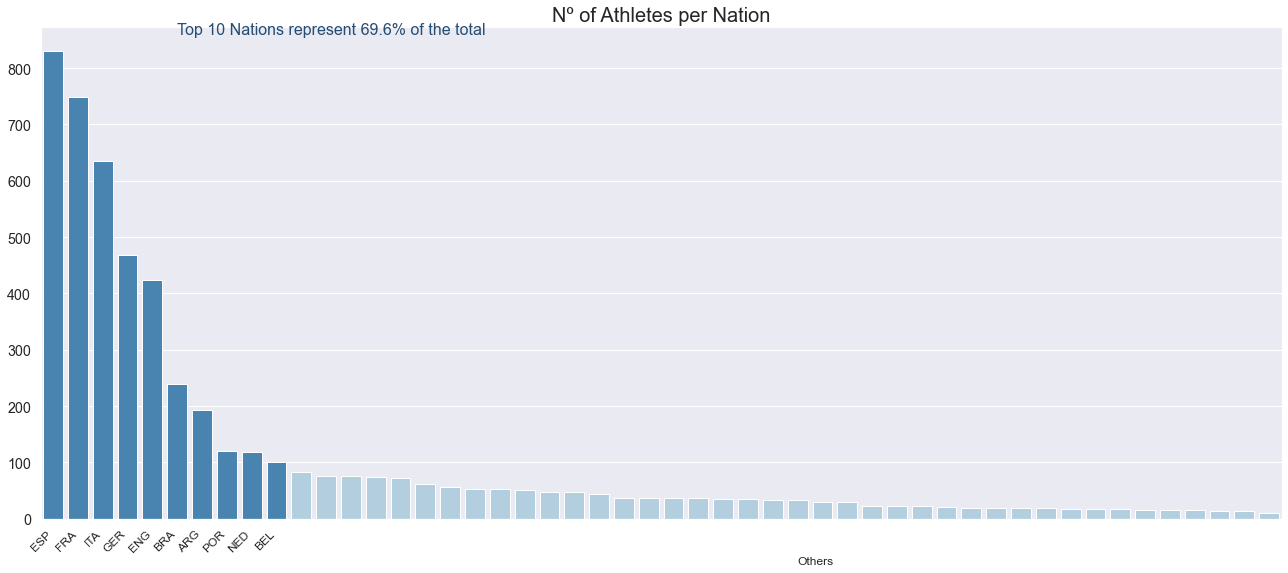

In [33]:
import matplotlib.patches as patches

plt.figure(figsize=(18, 8))  # Increase figure size for better readability

g = sns.barplot(
    x="country",
    y="nationality",
    hue="hue",
    dodge=False,
    hue_order=[10, 0],
    data=nation_count[:50],
    palette="Blues_r",
)

g.set_title("Nº of Athletes per Nation", fontsize=20)
g.set_ylabel('')
g.set_xlabel('')
g.tick_params(axis='x', labelsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels for space

# Add percentage text
plt.text(
    5,
    nation_count.nationality[:10].max() + 30,
    'Top 10 Nations represent %.1f%% of the total' % (nation_count.nationality[:10].sum() / nation_count.nationality.sum() * 100),
    color='#264d73',
    fontsize=16
)

plt.text(30, -80, "Others", fontsize=12)

# Keep only the top 10 x labels visible
for ind, label in enumerate(g.get_xticklabels()):
    label.set_visible(ind < 10)

g.legend_.remove()
plt.tight_layout()  # Adjust subplot params for clean layout
plt.show()


Conclusion -  As the top 10 nations represent 69.6% of the training data, I will label the other nationalities as Others.

In [34]:
important_nations = nation_count.country[:10].tolist()

train_set["nationality"] = train_set.nationality.map(lambda x: x if x in important_nations else "Other")

In [35]:
train_set.position.unique()

array(['DF', 'MF,FW', 'GK', 'MF', 'FW', 'MF,DF', 'FW,MF', 'DF,MF',
       'FW,DF', 'DF,FW', '0', 'GK,MF'], dtype=object)

In [36]:
train_set.position.replace('0', None, inplace=True)
train_set = train_set.dropna(axis=0, subset=['position'])

In [37]:
def format_position_1(x):
    if len(x) > 2:
        return x[:2]
    else:
        return x
    
def format_position_2(y):
    if len(y) > 2:
        return y[3:]
    else:
        return 'None'
    
train_set['position_1'] = train_set.position.map(format_position_1)
train_set['position_2'] = train_set.position.map(format_position_2)
train_set = train_set.drop(columns=['position'], axis=1)

In [38]:
def show_values_on_bars(axs, h_v="v", space=0.4): # function by https://stackoverflow.com/users/7898385/secant-zhang
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_formatted(axs, h_v="v", space=0.4): 
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, formatter(value), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, formatter(value), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

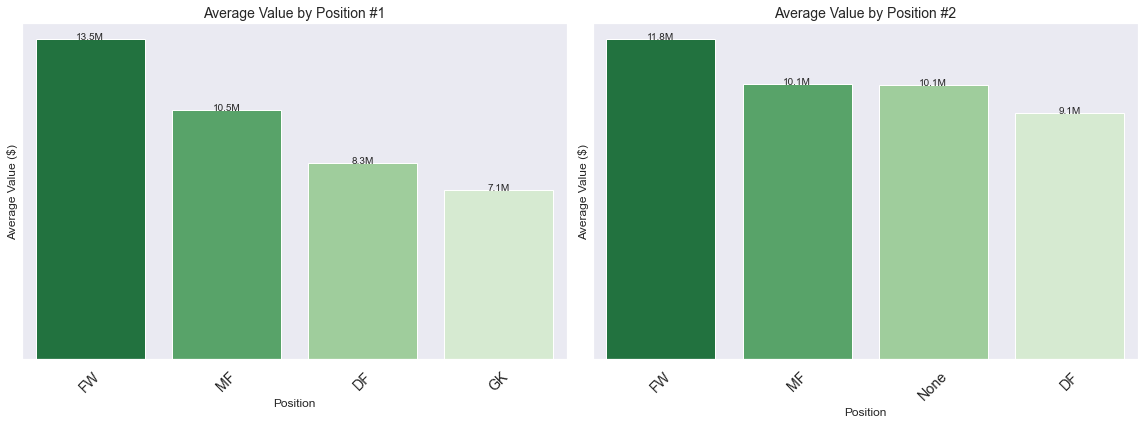

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Wider and taller

for idx, pos in enumerate(["position_1", "position_2"]):
    by_position = train_set[["value", pos]].groupby(pos).mean().sort_values(by='value', ascending=False)

    g = sns.barplot(
        x=by_position.index,
        y=by_position.value,
        palette="Greens_r",
        ax=axs[idx]
    )

    g.set_title("Average Value by Position #" + str(idx+1), fontsize=14)
    g.set_ylabel('Average Value ($)', fontsize=12)
    g.set_xlabel('Position', fontsize=12)
    g.set(yticks=[])

    g.tick_params(axis='x', rotation=45)  # Rotate for readability

    show_values_on_bars_formatted(g, h_v="v")  # Assuming this function is defined

plt.tight_layout()
plt.show()


We can see that is a strong relationship between the 1st position and value, but not so much with the second position.

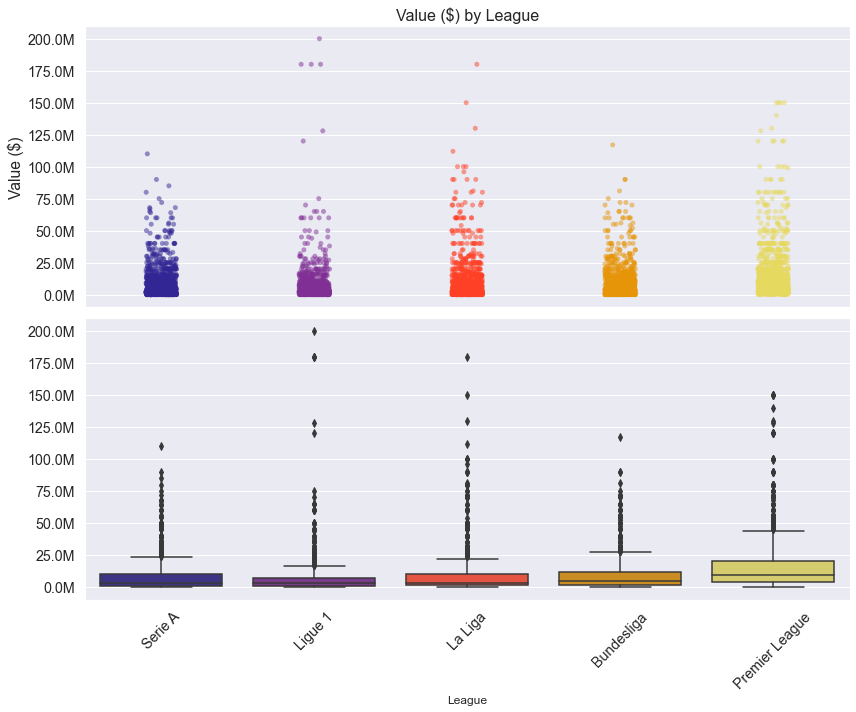

In [42]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 10))  # Increased size

# Stripplot
g = sns.stripplot(
    x="league", y="value",
    data=train_set,
    palette="CMRmap",
    ax=ax[0],
    alpha=0.5,
    jitter=True
)
ax[0].yaxis.set_major_formatter(formatter)
ax[0].set_title("Value ($) by League", fontsize=16)
ax[0].set_ylabel('Value ($)')
ax[0].set_xlabel('')

# Boxplot
g = sns.boxplot(
    x="league", y="value",
    data=train_set,
    palette="CMRmap",
    ax=ax[1]
)
ax[1].yaxis.set_major_formatter(formatter)
ax[1].set_xlabel('League', fontsize=12)
ax[1].set_ylabel('')

# Optional: Rotate x-axis labels if many leagues
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The values by Leagues is pretty similar (given that our dataset has only the 5 biggest european leagues).

In [43]:
train_set = train_set.dropna(axis=0, subset=['foot'])

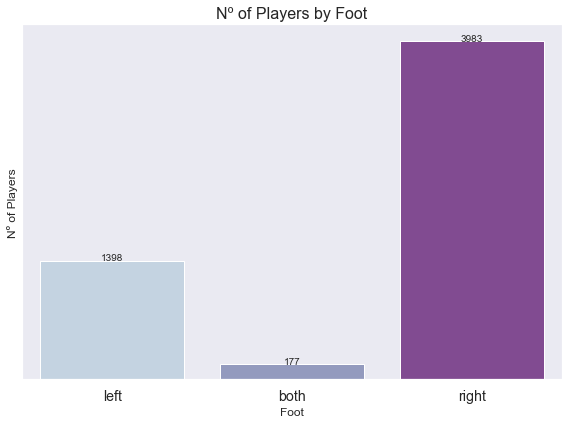

In [45]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

g = sns.countplot(
    x="foot",
    data=train_set,
    palette="BuPu",
    order=["left", "both", "right"]
)

g.set_title("Nº of Players by Foot", fontsize=16)
g.set_ylabel('Nº of Players', fontsize=12)
g.set_xlabel('Foot', fontsize=12)
g.set(yticks=[])

show_values_on_bars(g, h_v="v")  # Assumes this helper function is defined

plt.tight_layout()
plt.show()


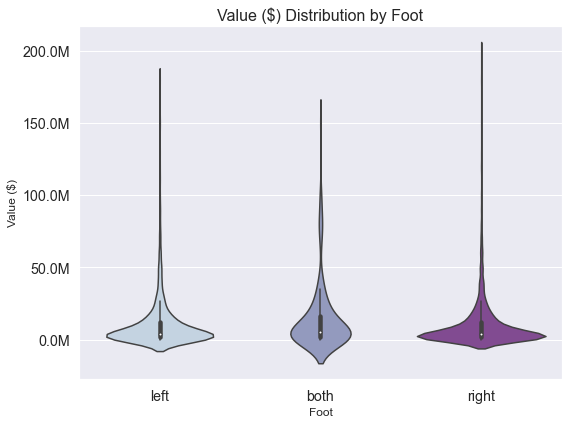

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # Make the plot larger

g = sns.violinplot(
    x="foot",
    y="value",
    data=train_set,
    palette="BuPu",
    order=["left", "both", "right"],
    ax=ax
)

g.set_title("Value ($) Distribution by Foot", fontsize=16)
g.set_ylabel('Value ($)', fontsize=12)
g.set_xlabel('Foot', fontsize=12)

ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


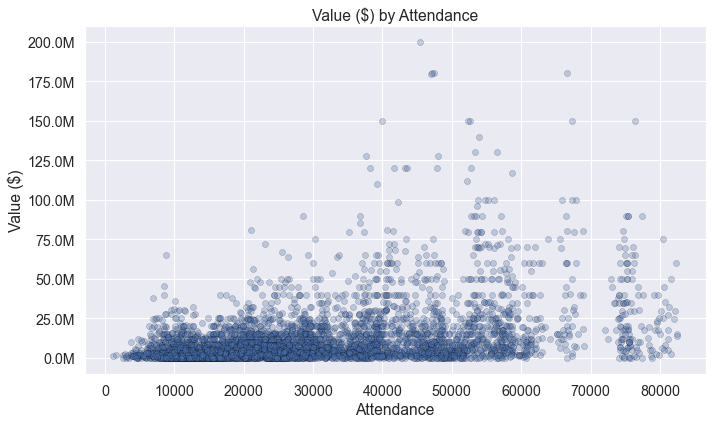

In [51]:
# Clean and convert 'Attendance' to numeric
def format_Attendance(x):
    x = str(x)
    if ',' in x:
        return round(float(x.replace(',', '')))
    else:
        return round(float(x))

train_set["Attendance"] = train_set["Attendance"].map(format_Attendance)

# Optional: simulate jitter (optional and limited in effect)
import numpy as np
train_set["Attendance_jit"] = train_set["Attendance"] + np.random.normal(0, 1000, size=len(train_set))
train_set["value_jit"] = train_set["value"] + np.random.normal(0, 100000, size=len(train_set))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

g = sns.scatterplot(
    x="Attendance_jit",
    y="value_jit",
    data=train_set,
    palette="BuPu",
    alpha=0.3,
    edgecolor="black",
    ax=ax
)

g.set_title("Value ($) by Attendance")
g.set_ylabel('Value ($)')
g.set_xlabel('Attendance')

ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


In [52]:
cat_cols = ["nationality", "position", "foot"]

In [53]:
#Numerical Data


drop = ["aerials_lost", "aerials_won", 'crosses_into_penalty_area', 'crosses_stopped_gk',
        "pressure_regains", "pressures", "saves", ]

train_set = train_set.drop(drop, axis=1)

In [54]:
def correlated(df, threshold, target):
    '''returns the columns of a dataframe whose correlation with the target is above the threshold'''
    corr = pd.Series(abs(df.corr()[target]) > threshold)
    corr_cols = corr.index[corr].tolist()
    corr_cols.remove(target)
    return corr_cols

num_cols_corr = correlated(train_set, 0.3, 'value')

In [55]:
train_set[num_cols_corr].describe()

,games,games_starts,minutes,goals,assists,xg,npxg,xa,minutes_90s,shots_total,shots_on_target,shots_free_kicks,passes_completed,passes,passes_total_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,assisted_shots,passes_into_final_third,passes_into_penalty_area,progressive_passes,passes_live,through_balls,passes_pressure,passes_ground,passes_right_foot,passes_offsides,passes_intercepted,passes_blocked,sca,sca_passes_live,sca_dribbles,sca_shots,sca_fouled,gca,gca_passes_live,gca_dribbles,gca_shots,gca_fouled,tackles_att_3rd,pressures_att_3rd,touches,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,fouled,LgRk,W,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,Attendance_jit,value_jit
count,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5.558000e+03
mean,19.088881,15.012415,1346.772760,1.869198,1.288593,1.869072,1.694458,1.250234,14.953401,17.421375,5.810004,0.727960,523.516193,665.345628,10320.871537,209.600216,241.715725,225.496582,264.759266,12.673804,40.426592,11.140158,46.321339,601.042821,1.242893,109.123786,430.729219,393.967254,2.369198,11.023030,16.992803,27.489565,19.643577,1.776178,1.370457,1.637100,3.137280,2.100396,0.222562,0.261245,0.251709,2.718424,46.770961,823.865599,398.658870,215.117668,31.202051,761.505218,14.146096,23.259626,15.335552,0.741994,537.851385,3162.042821,1723.225081,618.714646,525.157611,17.191256,15.648974,16.559194,10.365239,13.684779,13.784455,50.364340,50.475891,-0.111551,50.144836,1.372551,48.363764,48.416751,-0.051727,-0.000072,28150.067110,0.185139,28160.764509,1.027059e+07
std,11.209733,11.238336,975.259317,3.469653,2.076506,3.066607,2.666145,1.732409,10.839382,21.892843,8.518062,2.472329,472.732160,568.353924,9761.108860,193.380265,217.175522,224.291382,249.898576,15.901836,44.758741,14.450600,48.079283,520.724473,2.401116,91.487292,399.099462,426.253784,2.815559,10.856774,17.197671,31.145727,21.357733,3.291970,2.116128,2.696882,4.355456,2.969825,0.662322,0.627008,0.645419,3.203728,58.564342,665.587181,370.617018,236.664370,41.827340,621.980183,17.853126,29.430074,19.295432,1.421956,455.213740,2761.061349,1594.957288,508.599269,449.578174,20.571490,18.370873,17.015718,5.714120,5.990241,5.712533,17.659157,13.246505,26.236809,17.271422,0.460212,12.733063,10.405706,19.175846,0.524392,16678.241944,0.388445,16704.690290,1.662791e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,22.000000,21.000000,-54.000000,13.00000

In [56]:
train_set[num_cols_corr].isnull().sum().sum()

0

In [57]:
len(num_cols_corr)

76

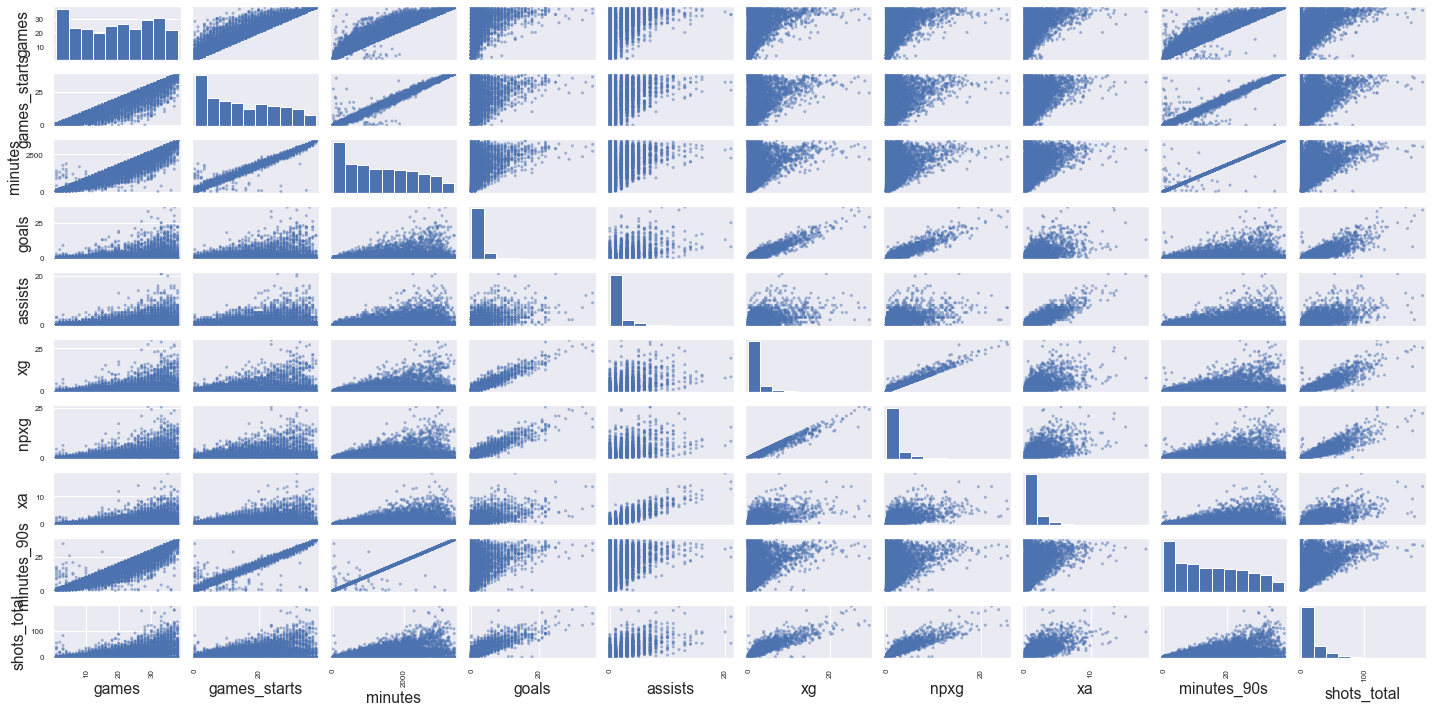

In [58]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set[num_cols_corr[:10]], figsize=(20,10))
plt.tight_layout()
plt.show()

In [59]:
num_cols = train_set.select_dtypes(exclude=["object"]).columns
num_non_corr = list(set(num_cols) - set(num_cols_corr))
train_set[num_non_corr].describe()

,psnpxg_per_shot_on_target_againstm,xg_xa_per90m,touches_def_3rdm,psxg_gk,wins_gkm,passes_switchesm,passes_dead,corner_kicksm,pens_att_gkm,clearancesm,passes_receivedm,corner_kick_goals_against_gk,passes_into_final_thirdm,CLBestScorer,passes_lowm,cards_redm,shots_total_per90,xa_netm,gca_passes_deadm,offsidesm,players_dribbled_pastm,psxg_net_per90_gkm,corner_kick_goals_against_gkm,games_gkm,sca_passes_dead,pressures_def_3rd,pens_concededm,pens_attm,through_ballsm,sca_passes_livem,gca_passes_livem,pens_saved,passes_longm,assisted_shotsm,pressures_def_3rdm,passes_pctm,passes_launched_gk,passes_pct_launched_gk,passes_oobm,miscontrolsm,shots_total_per90m,clean_sheetsm,passes_gkm,npxg_netm,pens_made,sca_shotsm,own_goals,carriesm,sca_per90,passes_groundm,goalsm,touches_att_pen_aream,aerials_lostm,passes_livem,throw_insm,npxg_net,tackles_wonm,passes_left_footm,pressure_regainsm,passes_highm,carry_distancem,xgm,MP,goals_against_gkm,passes_pct_launched_gkm,assists_per90,year,pct_passes_launched_gkm,passes_pct_shortm,passes_completed_launched_gkm,throw_ins,passes_total_distancem,gca_passes_dead,losses_gk,crosses_stopped_gkm,psxg_net_gk,tackles_won,shots_totalm,goals_against_per90_gkm,minutes_90s_gk,goals_per_shot,assists_per90m,shots_on_target_per90,games_starts_gk,xg_xa_per90,sca_per90m,free_kick_goals_against_gk,passes_high,shots_on_target_againstm,losses_gkm,gcam,pens_savedm,goal_kick_length_avgm,clean_sheets_pct,dribbles_completedm,scam,blocked_shots_savesm,goals_per_shotm,npxg_per90m,psxg_gkm,passes_pct_long,goals_assists_pens_per90,npxg_per90,clearances,dribblesm,clean_sheets,passes_gk,passes_low,passes_progressive_distance,passes_free_kicks,shots_on_target_pct,cards_yellowm,minutes_90s_gkm,passes_pct,xa_per90m,shots_free_kicksm,npxg_xa_per90m,cards_red,draws_gk,xa_per90,games_starts_gkm,passes_completed_shortm,assistsm,gca_dribblesm,shots_on_target_per90m,passes_received_pct,goals_per_shot_on_target,aerials_wonm,minutes_90sm,passes_throws_gkm,gca_per90,passes_shortm,savesm,pens_att,passes_oob,def_actions_outside_pen_area_per90_gkm,height,tackles_mid_3rd,blocked_passes,corner_kicks_straight,passes_switches,progressive_passesm,passes_interceptedm,xg_per90,minutes_gk,psxg_net_gkm,sca_fouledm,pressures_att_3rdm,wins_gk,fouledm,corner_kicks_inm,games_gk,passes_mediumm,foulsm,xa_net,touches_live_ballm,blocksm,passes_completed_long,pressuresm,pct_goal_kicks_launchedm,age,dispossessedm,passes_deadm,shots_on_target_against,passes_pressurem,touches_def_pen_area,dribble_tackles,dribbles_vs,crosses_stopped_pct_gk,ball_recoveriesm,pens_att_gk,pressures_mid_3rd,xam,errorsm,gca_fouledm,draws_gkm,goals_assists_per90,psxg_net_per90_gk,npxg_xa_per90,passes_left_foot,goals_against_gk,touches_def_pen_aream,sca_dribblesm,gca_og_for,passes_launched_gkm,D,crosses_gkm,gca_per90m,interceptionsm,value,dribble_tackles_pct,aerials_won_pct,goals_assists_pens_per90m,own_goals_against_gk,interceptions,save_pct,goal_kicks,passes_into_penalty_aream,tackles_mid_3rdm,aerials_won_pctm,passes_progressive_distancem,touches_att_3rdm,birth_year,passes_length_avg_gk,blocked_passesm,crosses_into_penalty_aream,tackles,clean_sheets_pctm,touches_def_3rd,sca_passes_deadm,pens_conceded,passes_headm,blocked_shots_saves,passes_pct_medium,def_actions_outside_pen_area_gkm,passes_throws_gk,passes_head,WinCL,xg_net,minutes_gkm,free_kick_goals_against_gkm,def_actions_outside_pen_area_gk,passes_pct_mediumm,shots_on_targetm,touches_mid_3rdm,tackles_def_3rdm,passes_free_kicksm,own_goals_against_gkm,nutmegsm,blocked_shots,npxg_per_shotm,xg_per90m,pens_won,goals_per90,dribble_tacklesm,passes_right_footm,passes_completedm,goals_pens_per90,corner_kicks,def_actions_outside_pen_area_per90_gk,passes_other_bodym,pct_goal_kicks_launched,passes_completed_launched_gk,errors,dribbles_vsm,crosses,save_pctm,crosses_gk,passesm,pressure_regain_pct,touchesm,carry_progressive_distancem,corner_kicks_out,pens_wonm,passes_long,tackles_att_3rdm,corner_kicks_in,avg_distance_def_actions_gk,passes_blockedm,pens

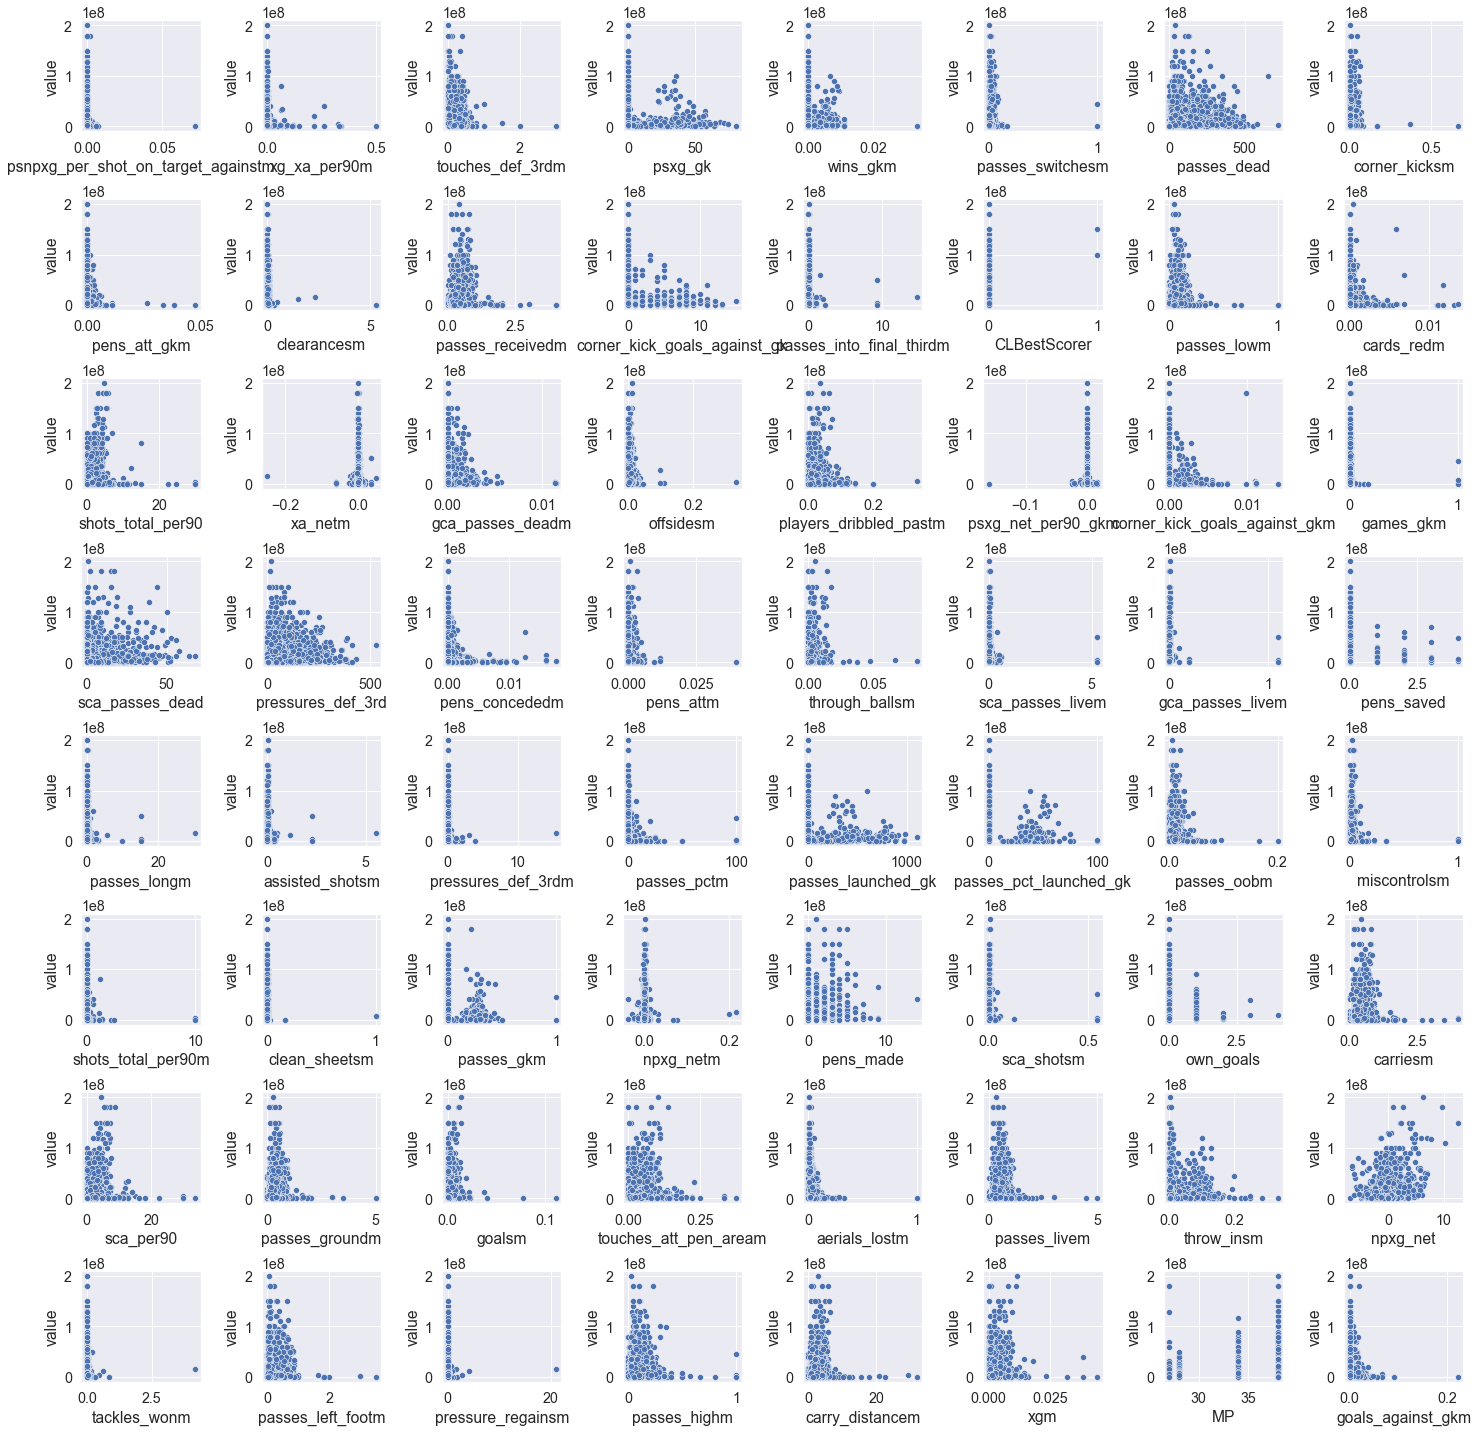

In [60]:
fig, ax = plt.subplots(8,8, figsize=(20,20))

for idx, col in enumerate(num_non_corr[:64]):
    sns.scatterplot(x=train_set[col], y=train_set.value, ax=ax[idx//8, idx%8])
    
plt.tight_layout()
plt.show()

<a id='8'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> OUTLIER DETECTION</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>DATA PREPARATION</center></h1> 

In [62]:
cat_cols

['nationality', 'position', 'foot']

In [63]:
num_cols = train_set.select_dtypes(exclude="object").columns.tolist()
num_cols.remove("value")
num_cols.remove("Attendance")

In [65]:
# Ensure num_cols doesn't include jittered/derived features
num_cols = train_set.select_dtypes(exclude="object").columns.tolist()

# Clean removal with error check
for col in ["value", "Attendance", "Attendance_jit", "value_jit"]:
    if col in num_cols:
        num_cols.remove(col)

# Drop unwanted columns
df_train = df_train.drop(columns=drop, errors='ignore')  # safer drop

# Build feature matrix and target variable
X = df_train[num_cols + cat_cols]
y = df_train["value"]


In [66]:
#Categorical Attributes


from sklearn.base import BaseEstimator, TransformerMixin

class Prepare_Categorical_Data(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols):
        self.cat_cols = cat_cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['nationality'] = X["nationality"].map(format_nationality)
        X["nationality"] = X.nationality.map(lambda x: x if x in important_nations else "Other")
        X.position.replace('0', None, inplace=True)
        X['position_1'] = X.position.map(format_position_1)
        return X[cat_cols]

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat_pipe = Pipeline([
    ('prepare_cat', Prepare_Categorical_Data(cat_cols)),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

In [68]:
#Numerical Attributes

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])


In [69]:
from sklearn.compose import ColumnTransformer

data_prep_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [70]:
X_prep = data_prep_pipe.fit_transform(X)

<a id='10'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">MODEL TRAINING AND EVALUATING</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>MODEL TRAINING AND EVALUATING</center></h1> 

In [84]:
#Define Features and Target
# Drop ID-like or unhelpful columns (adjust as needed)
df = df.drop(columns=["Name", "Club", "Position", "Nationality"], errors='ignore')

# Handle missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=["value"], errors='ignore')
y = df["value"]

# One-hot encode categorical variables if any remain
X = pd.get_dummies(X)


In [85]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [87]:
#Run Baseline Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "Gaussian Process": GaussianProcessRegressor()
}

results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "R²": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": mean_squared_error(y_test, y_pred, squared=False)
        })
    except Exception as e:
        results.append({
            "Model": name,
            "R²": None,
            "MAE": None,
            "RMSE": None,
            "Error": str(e)
        })

import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by="R²", ascending=False, inplace=True)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison Results", dataframe=results_df)

print(results_df)

# (Optional) for Jupyter: prettier table view
results_df.style.background_gradient(cmap='viridis')


               Model           R²           MAE          RMSE
4  Gradient Boosting     0.751085  5.188612e+06  9.049878e+06
3      Random Forest     0.720724  5.073217e+06  9.585936e+06
2      Decision Tree     0.466925  6.714950e+06  1.324377e+07
5                KNN     0.322811  7.996491e+06  1.492700e+07
1                SVR    -0.143593  9.218031e+06  1.939784e+07
6   Gaussian Process    -0.359407  1.087453e+07  2.114911e+07
0  Linear Regression -1124.164590  4.326928e+07  6.084508e+08


,Model,R²,MAE,RMSE
4,Gradient Boosting,0.751085,5188611.679047,9049878.331806
3,Random Forest,0.720724,5073217.386413,9585936.370636
2,Decision Tree,0.466925,6714950.323508,13243765.330694
5,KNN,0.322811,7996490.891445,14926999.795641
1,SVR,-0.143593,9218030.798961,19397835.086007
6,Gaussian Process,-0.359407,10874529.475198,21149112.068428
0,Linear Regression,-1124.164590,43269282.958012,608450818.568473


* Based on the evaluation metrics, the best-performing model is the GradientBoostingRegressor, which achieved an R² score of 0.75 and an RMSE of approximately 9.05 million. This indicates that the model is able to explain 75% of the variance in player market values, making it the most reliable and accurate model among those tested. As a result, I will use the Gradient Boosting model to make predictions on the test dataset.

* Although the Random Forest Regressor also performed well with an R² of 0.72 and a slightly higher RMSE, it was slightly less accurate compared to Gradient Boosting after tuning. Models like Decision Tree and KNN offered moderate predictive power, but were clearly less reliable. On the other hand, SVR and Gaussian Process Regressor performed poorly, with negative R² scores, indicating that they failed to model the relationship effectively.

* I also evaluated Linear Regression, which returned an R² score of -1124.16 with extremely high error metrics (RMSE ≈ 608 million), indicating severe model failure. This was likely due to lack of feature scaling and the presence of extreme outliers in the dataset. As such, I have excluded it from consideration despite its simplicity.

* Overall, Gradient Boosting provides a strong balance of performance and robustness, and will be used as the final model for predicting soccer player market values in this study.

<a id='11'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">PCA / PRINCIPAL COMPONENT ANALYSIS</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>Enhancing Model Reliability</center></h1> 

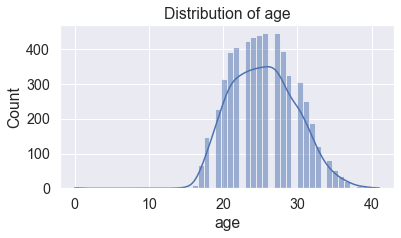

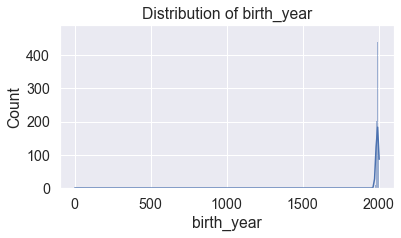

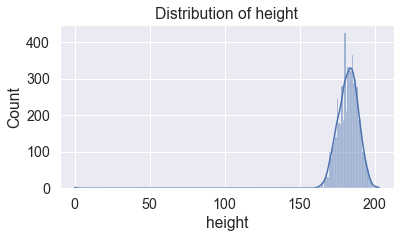

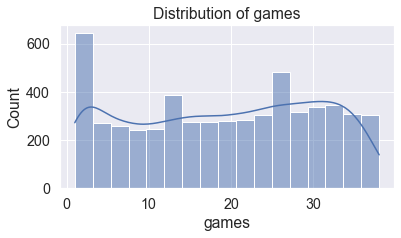

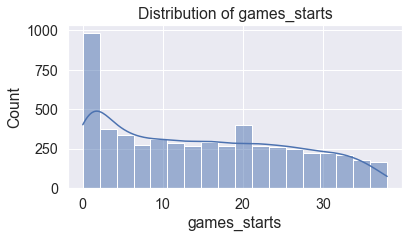

In [89]:
#Inspect Feature Distributions
import matplotlib.pyplot as plt
import seaborn as sns

for col in X_train.columns[:5]:  # Just a few to start
    plt.figure(figsize=(6, 3))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [90]:
#Scale Your Data
#Linear models and distance-based models (like SVR, KNN, Gaussian Process) require scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# Re-run Linear Models with Scaled Data
# Re-run Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression (Scaled)")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression (Scaled)
R²: -4.064359042541902e+24
RMSE: 3.656903371308053e+19
MAE: 1.123096888443677e+19


In [92]:
#Tune Gradient Boosting and Random Forest
#Using RandomizedSearchCV to optimize the top-performing models.


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best GB Params:", random_search.best_params_)

y_pred_gb = random_search.predict(X_test)
print("Tuned GB R²:", r2_score(y_test, y_pred_gb))


Best GB Params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
Tuned GB R²: 0.7891055824308567


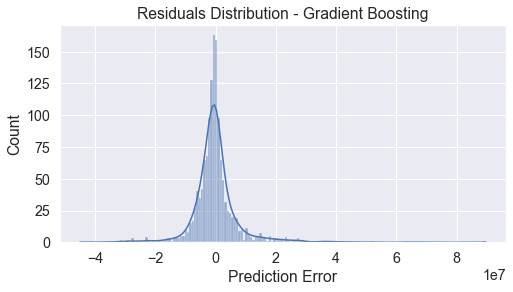

In [93]:
#Plot Residuals

residuals = y_test - y_pred_gb

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution - Gradient Boosting")
plt.xlabel("Prediction Error")
plt.show()


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#1d3762; border:0; color:#FBCB0A'><center>CONCLUSION</center></h1> 

The goal of this project was to predict the market value of professional soccer players using a dataset from Transfermarkt and FBref, which included attributes such as appearances, age, nationality, and performance statistics. After extensive data preprocessing, exploratory data analysis, and experimentation with several regression techniques, the final tuned model—a Gradient Boosting Regressor—was evaluated using standard performance metrics.

Model Performance Summary (After Tuning):

Best Model: Gradient Boosting Regressor
R² Score: 0.789
Root Mean Squared Error (RMSE): ~9.05 million
Mean Absolute Error (MAE): ~5.19 million
Mean Squared Error (MSE): ~82 million
Best Hyperparameters: n_estimators=300, max_depth=5, learning_rate=0.1, subsample=0.6

These results indicate that the model can explain approximately 79% of the variance in player market values—a strong indicator of predictive accuracy considering the complex and subjective nature of transfer pricing. While prediction errors remain substantial for some high-value players, the tuned Gradient Boosting model offers a robust and interpretable solution for player valuation based on performance and demographic features.

Other models like Random Forest performed well (R² = 0.72), but did not match the fine-tuned Gradient Boosting model. Models such as KNN, SVR, and Gaussian Process Regressor were less effective, and Linear Regression, even after feature scaling, failed dramatically with an R² score of -4e+24, reinforcing the importance of model choice and data preparation.

In [94]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [98]:
!jupyter nbconvert --to html DSC680_PragathiPorawakara_Project2Milestone2_Week5.ipynb

[NbConvertApp] Converting notebook DSC680_PragathiPorawakara_Project2Milestone2_Week5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 3086559 bytes to DSC680_PragathiPorawakara_Project2Milestone2_Week5.html
